# Sentiment Analysis - TF-IDF
------------------------------------
## Initialize Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## Import Data

In [3]:
# df1.to_csv('data/working_df.csv')
df1=pd.read_csv('data/working_df.csv')

### Train-Test Split

In [4]:
# libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [5]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df1['rev_clean'], df1['sentiment'], test_size=0.20,
                                                    random_state = 40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23038,) (5760,) (23038,) (5760,)


## Generating TF-IDF Embedding

### Initialize Libraries

In [6]:
import re, string 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=200000)
X_train_text = text_transformer.fit_transform(X_train.astype('U'))
X_test_text = text_transformer.transform(X_test.astype('U'))

## Logistic Regression

In [12]:
logisticRegr = LogisticRegression()

In [13]:
logisticRegr.fit(X_train_text, y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix

In [17]:
lr_tr_pred = logisticRegr.predict(X_train_text)

In [19]:
print ('Accuracy:', accuracy_score(y_train, lr_tr_pred))
print ('F1 score:', f1_score(y_train, lr_tr_pred,average='micro'))
print ('Recall:', recall_score(y_train, lr_tr_pred,average='micro'))
print ('Precision:', precision_score(y_train, lr_tr_pred,average='micro'))
print ('\n Clasification report:\n', classification_report(y_train,lr_tr_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, lr_tr_pred))

Accuracy: 0.8797638683913535
F1 score: 0.8797638683913535
Recall: 0.8797638683913535
Precision: 0.8797638683913535

 Clasification report:
               precision    recall  f1-score   support

    negative       0.96      0.46      0.62      4981
    positive       0.87      1.00      0.93     18057

    accuracy                           0.88     23038
   macro avg       0.92      0.73      0.78     23038
weighted avg       0.89      0.88      0.86     23038


 Confusion matrix:
 [[ 2299  2682]
 [   88 17969]]


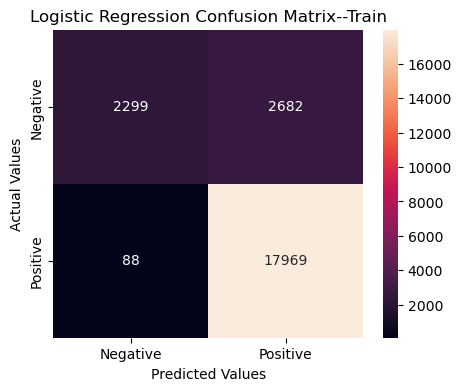

In [20]:
lrcm = confusion_matrix(y_train, lr_tr_pred)
lrcm_df = pd.DataFrame(lrcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(lrcm_df, annot=True,fmt='g')
plt.title('Logistic Regression Confusion Matrix--Train')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [21]:
lr_pred = logisticRegr.predict(X_test_text)

In [22]:
print ('Accuracy:', accuracy_score(y_test, lr_pred))
print ('F1 score:', f1_score(y_test, lr_pred, average='micro'))
print ('Recall:', recall_score(y_test, lr_pred, average='micro'))
print ('Precision:', precision_score(y_test, lr_pred, average='micro'))
print ('\n Clasification report:\n', classification_report(y_test, lr_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, lr_pred))

Accuracy: 0.8378472222222222
F1 score: 0.8378472222222222
Recall: 0.8378472222222222
Precision: 0.8378472222222222

 Clasification report:
               precision    recall  f1-score   support

    negative       0.82      0.32      0.46      1243
    positive       0.84      0.98      0.90      4517

    accuracy                           0.84      5760
   macro avg       0.83      0.65      0.68      5760
weighted avg       0.84      0.84      0.81      5760


 Confusion matrix:
 [[ 393  850]
 [  84 4433]]


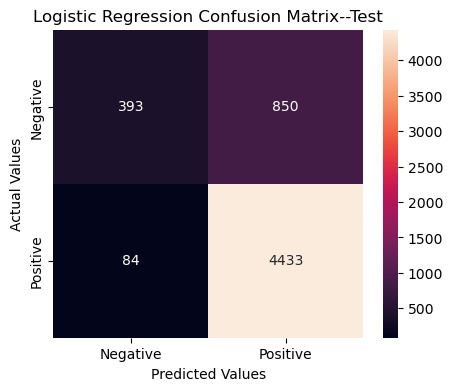

In [23]:
lrcm_test = confusion_matrix(y_test, lr_pred)
lrcm_t_df = pd.DataFrame(lrcm_test,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(lrcm_t_df, annot=True,fmt='g')
plt.title('Logistic Regression Confusion Matrix--Test')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Naive Bayes

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()

In [26]:
# Fit the model
clf_nb.fit(X_train_text, y_train)

MultinomialNB()

In [27]:
nb_train_pred = list(clf_nb.predict(X_train_text))

In [28]:
print ('Accuracy:', accuracy_score(y_train, nb_train_pred))
print ('F1 score:', f1_score(y_train, nb_train_pred, average='micro'))
print ('Recall:', recall_score(y_train, nb_train_pred, average='micro'))
print ('Precision:', precision_score(y_train, nb_train_pred, average='micro'))
print ('\n Clasification report:\n', classification_report(y_train, nb_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train, nb_train_pred))

Accuracy: 0.7843128743814567
F1 score: 0.7843128743814566
Recall: 0.7843128743814567
Precision: 0.7843128743814567

 Clasification report:
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00      4981
    positive       0.78      1.00      0.88     18057

    accuracy                           0.78     23038
   macro avg       0.89      0.50      0.44     23038
weighted avg       0.83      0.78      0.69     23038


 Confusion matrix:
 [[   12  4969]
 [    0 18057]]


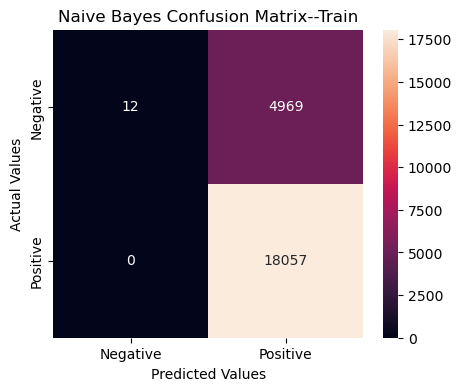

In [29]:
nbcm = confusion_matrix(y_train, nb_train_pred)
nbcm_df = pd.DataFrame(nbcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(nbcm_df, annot=True,fmt='g')
plt.title('Naive Bayes Confusion Matrix--Train')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [32]:
nb_pred = list(clf_nb.predict(X_test_text))

In [33]:
print ('Accuracy:', accuracy_score(y_test, nb_pred))
print ('F1 score:', f1_score(y_test, nb_pred, average='micro'))
print ('Recall:', recall_score(y_test, nb_pred, average='micro'))
print ('Precision:', precision_score(y_test, nb_pred, average='micro'))
print ('\n Clasification report:\n', classification_report(y_test, nb_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, nb_pred))

Accuracy: 0.7842013888888889
F1 score: 0.7842013888888889
Recall: 0.7842013888888889
Precision: 0.7842013888888889

 Clasification report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1243
    positive       0.78      1.00      0.88      4517

    accuracy                           0.78      5760
   macro avg       0.39      0.50      0.44      5760
weighted avg       0.61      0.78      0.69      5760


 Confusion matrix:
 [[   0 1243]
 [   0 4517]]


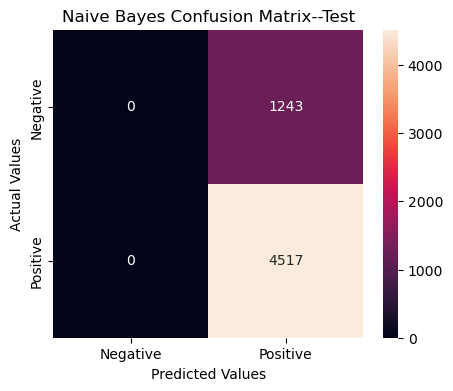

In [34]:
nbcm_test = confusion_matrix(y_test, nb_pred)
nbcm_t_df = pd.DataFrame(nbcm_test,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(nbcm_t_df, annot=True,fmt='g')
plt.title('Naive Bayes Confusion Matrix--Test')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Random Forest

In [36]:
# import RF module
from sklearn.ensemble import RandomForestClassifier

# initialize model (hyperparameters not tuned yet 25 Mar)
clf_rf = RandomForestClassifier(n_estimators= 80,  min_samples_split= 2,  min_samples_leaf= 2, 
                                               max_features= 'auto',  max_depth= 12, criterion= 'entropy',
                                               bootstrap= True, class_weight='balanced') 


# Fit the model
clf_rf.fit(X_train_text, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='auto', min_samples_leaf=2,
                       n_estimators=80)

In [40]:
# performing predictions on the test dataset
y_pred = clf_rf.predict(X_train_text)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    negative       0.54      0.76      0.63      4981
    positive       0.93      0.82      0.87     18057

    accuracy                           0.81     23038
   macro avg       0.73      0.79      0.75     23038
weighted avg       0.84      0.81      0.82     23038



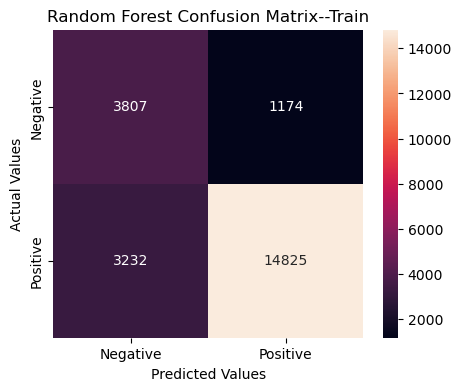

In [41]:
rfcm = confusion_matrix(y_train, y_pred)
rfcm_df = pd.DataFrame(rfcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(rfcm_df, annot=True,fmt='g')
plt.title('Random Forest Confusion Matrix--Train')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [44]:
# performing predictions on the test dataset
test_pred = clf_rf.predict(X_test_text)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    negative       0.48      0.63      0.55      1243
    positive       0.89      0.81      0.85      4517

    accuracy                           0.77      5760
   macro avg       0.68      0.72      0.70      5760
weighted avg       0.80      0.77      0.78      5760



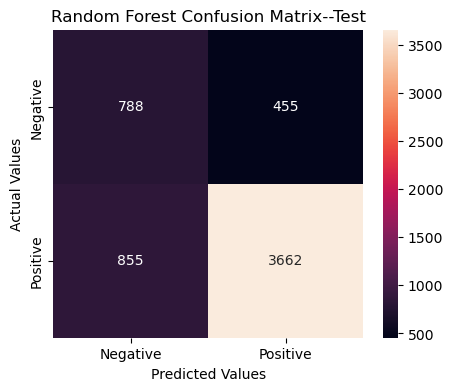

In [46]:
rfcm = confusion_matrix(y_test, test_pred)
rfcm_df = pd.DataFrame(rfcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(rfcm_df, annot=True,fmt='g')
plt.title('Random Forest Confusion Matrix--Test')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()